# Hierarchical Clustering

**Agglomerative Hierarchical Clustering**
- This is a bottom-up approach where each data point starts as its own cluster, and pairs of clusters are merged as one moves up the hierarchy2
- The process continues until only one cluster is left3
- It's like building a family tree from individual leaves up to the root3

**Divisive Hierarchical Clustering**
- This is a top-down approach where all data points start in one large cluster3
- The cluster is then split recursively into smaller clusters until each data point is in its own cluster3
- Think of it as starting with a single large box and dividing it into smaller boxes until each item is in its own box.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing 

plt.style.use('bmh')

In [7]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/Mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

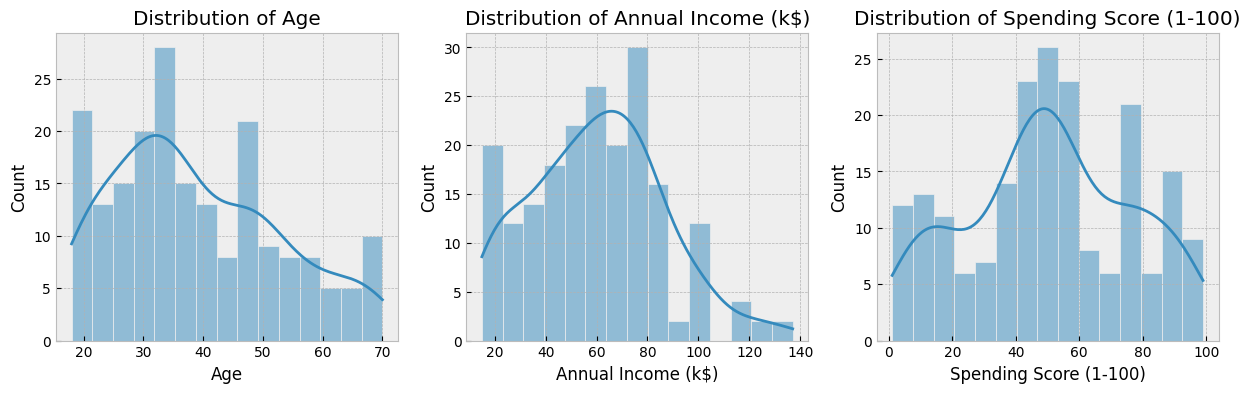

In [14]:

# Set up the figure with a 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
plt.subplots_adjust(hspace=0.2, wspace=0.2)  # Adjust spacing

# Loop through each feature and its corresponding subplot axis
for ax, feature in zip(axes, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    sns.histplot(df[feature], bins=15, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')



In [17]:
# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


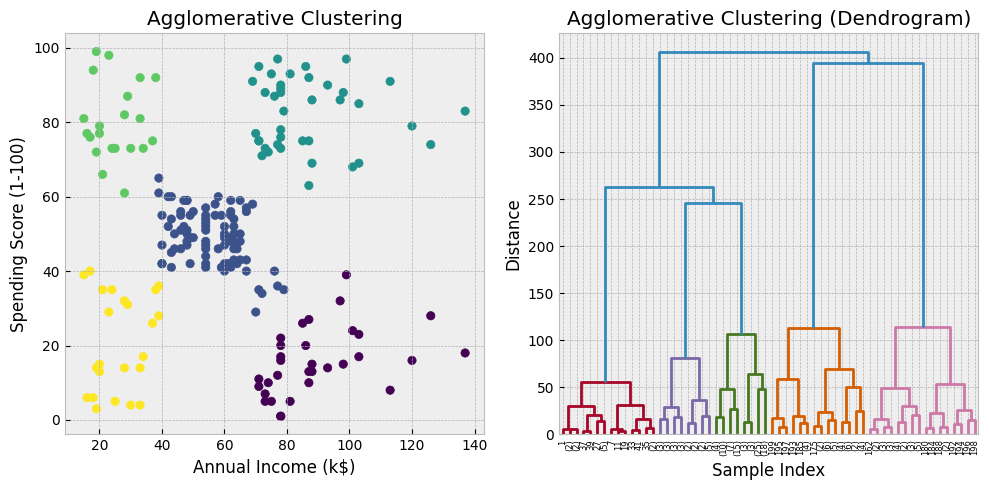

In [24]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# Scatter Plot for Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agglo_labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("Agglomerative Clustering")

# Dendrogram for Agglomerative Clustering
Z = linkage(X, 'ward')
plt.subplot(1, 2, 2)
dendrogram(Z, truncate_mode='level', p=5, color_threshold=120)
plt.title("Agglomerative Clustering (Dendrogram)")
plt.xlabel('Sample Index')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


### Cluster Analysis
- Dark Blue - Low Income, Low Spending
- Yellow - Low Income, High Spending
- Red - Medium Income, Medium Spending
- Purple - High Income, Low Spending
- Blue - High Income, High Spending

## Using All Features

In [19]:
label_encoder = preprocessing.LabelEncoder() 

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [20]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(df)
y_hc

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [21]:
df['cluster'] = pd.DataFrame(y_hc)


In [22]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [ ]:
df.to_csv("segmented_customers.csv", index = False)
